In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# step-01: get data
data = load_iris()
x_data=data.data
y_data=data.target
# step-02: train rf
clf = RandomForestClassifier(random_state=0, oob_score=True)
clf.fit(x_data,y_data)
# step-03: oob error estimate
print(clf.oob_score_)

0.9533333333333334


In [3]:
import random
import pandas as pd
import numpy as np
from sklearn.utils import resample  

def scalegirl(samples):
    '''
    统计抽样结果中：女性/男性比例
    '''
    count =0.0
    total = samples.size
    for sex in samples:
        if(sex==0):
            count+=1.0
#     print(count)
    return count/(total-count)
 
boy = (np.ones(1000))
girl = (np.zeros(800))
#girl/boy=0.8
 
# print(girl.shape)
all = np.hstack((boy, girl))
scale = 0.0
iter = 10000
for i in range(iter):
    bootstrapSamples = resample(all,n_samples=100,replace=1)
#     print(bootstrapSamples)
    tempscale = scalegirl(bootstrapSamples) # 比例—女性：男性
#     print(tempscale)
    scale+=tempscale
print(scale/iter) # 计算10000次的平均 女/男

0.8126863474374917


In [4]:
np.random.seed(123)
pop = np.random.randint(0,500 , size=1000)
sample = np.random.choice(pop, size=300) #so n=300

In [5]:
sample_mean = []
for _ in range(10000):  #so B=10000
    sample_n = np.random.choice(sample, size=300)
    sample_mean.append(sample_n.mean())


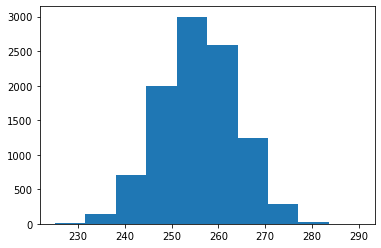

In [11]:
import matplotlib.pyplot as plt
img=plt.hist(sample_mean)
plt.savefig("img.png")

In [7]:
np.mean(sample_mean)

255.73952966666664

In [ ]:
class Bagging:
     def __init__(self, base_learner, n_learners):
        self.learners = [clone(base_learner) for _ in range(n_learners)]

     def fit(self, X, y):
         for learner in self.learners:
             examples = np.random.choice(
                 np.arange(len(X)), int(len(X)), replace=True)
             learner.fit(X.iloc[examples, :], y.iloc[examples])
             
     def predict(self, X):
         preds = [learner.predict(X) for learner in self.learners]
         return np.array(preds).mean(axis=0) 

In [19]:
from statistics import LinearRegression
import pylab
import sklearn 
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics 
if __name__=="__main__": data=datasets.load_breast_cancer() 

x_train,x_test,y_train,y_test = model_selection.train_test_split(data.data, data.target) 
clf = BaggingRegressor() 
clf.fit(x_train,y_train) 
y_predict=clf.predict(x_test) 
Accuracy=metrics.mean_squared_error(y_predict,y_test) 
print("数据集的均方误差为:\n{}".format(Accuracy)) 



数据集的均方误差为:
0.04321678321678322


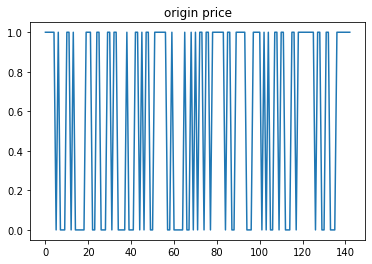

In [26]:
pylab.mpl.rcParams['font.sans-serif'] = ['FangSong'] 
pylab.mpl.rcParams['axes.unicode_minus'] = False
pylab.title('origin price') 
pylab.plot([i for i in range(len(y_test))],y_test) #画出模型预测房价图 

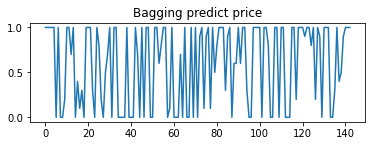

In [27]:
pylab.subplot(2, 1, 2)
pylab.title('Bagging predict price')
pylab.plot([i for i in range(len(y_predict))], y_predict)
pylab.show()

<AxesSubplot:>

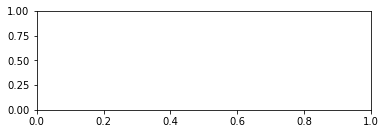

In [24]:
pylab.mpl.rcParams['font.sans-serif'] = ['FangSong']
pylab.mpl.rcParams['axes.unicode_minus'] = False
pylab.plot([i for i in range(len(y_test))], y_test)  #画出模型预测房价图
pylab.subplot(2, 1, 2)
pylab.title('Bagging算法预测房价')

In [60]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

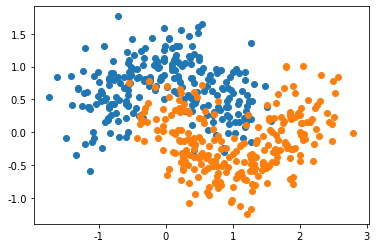

In [30]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500,
                                max_samples=100,
                                bootstrap=True,
                                oob_score=True)


In [32]:
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, oob_score=True)

In [33]:
bagging_clf.oob_score_

0.916

In [35]:
clf = RandomForestClassifier(random_state=0, oob_score=True)
clf.fit(X, y)
# step-03: oob error estimate
print(clf.oob_score_)

0.9


In [59]:
from sklearn import tree
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
score = cross_val_score(clf, X, y, cv=cv).mean()
print(score)
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=42)
score = cross_val_score(clf,X, y, cv=cv).mean()
print(score)

0.8539999999999999
0.858
